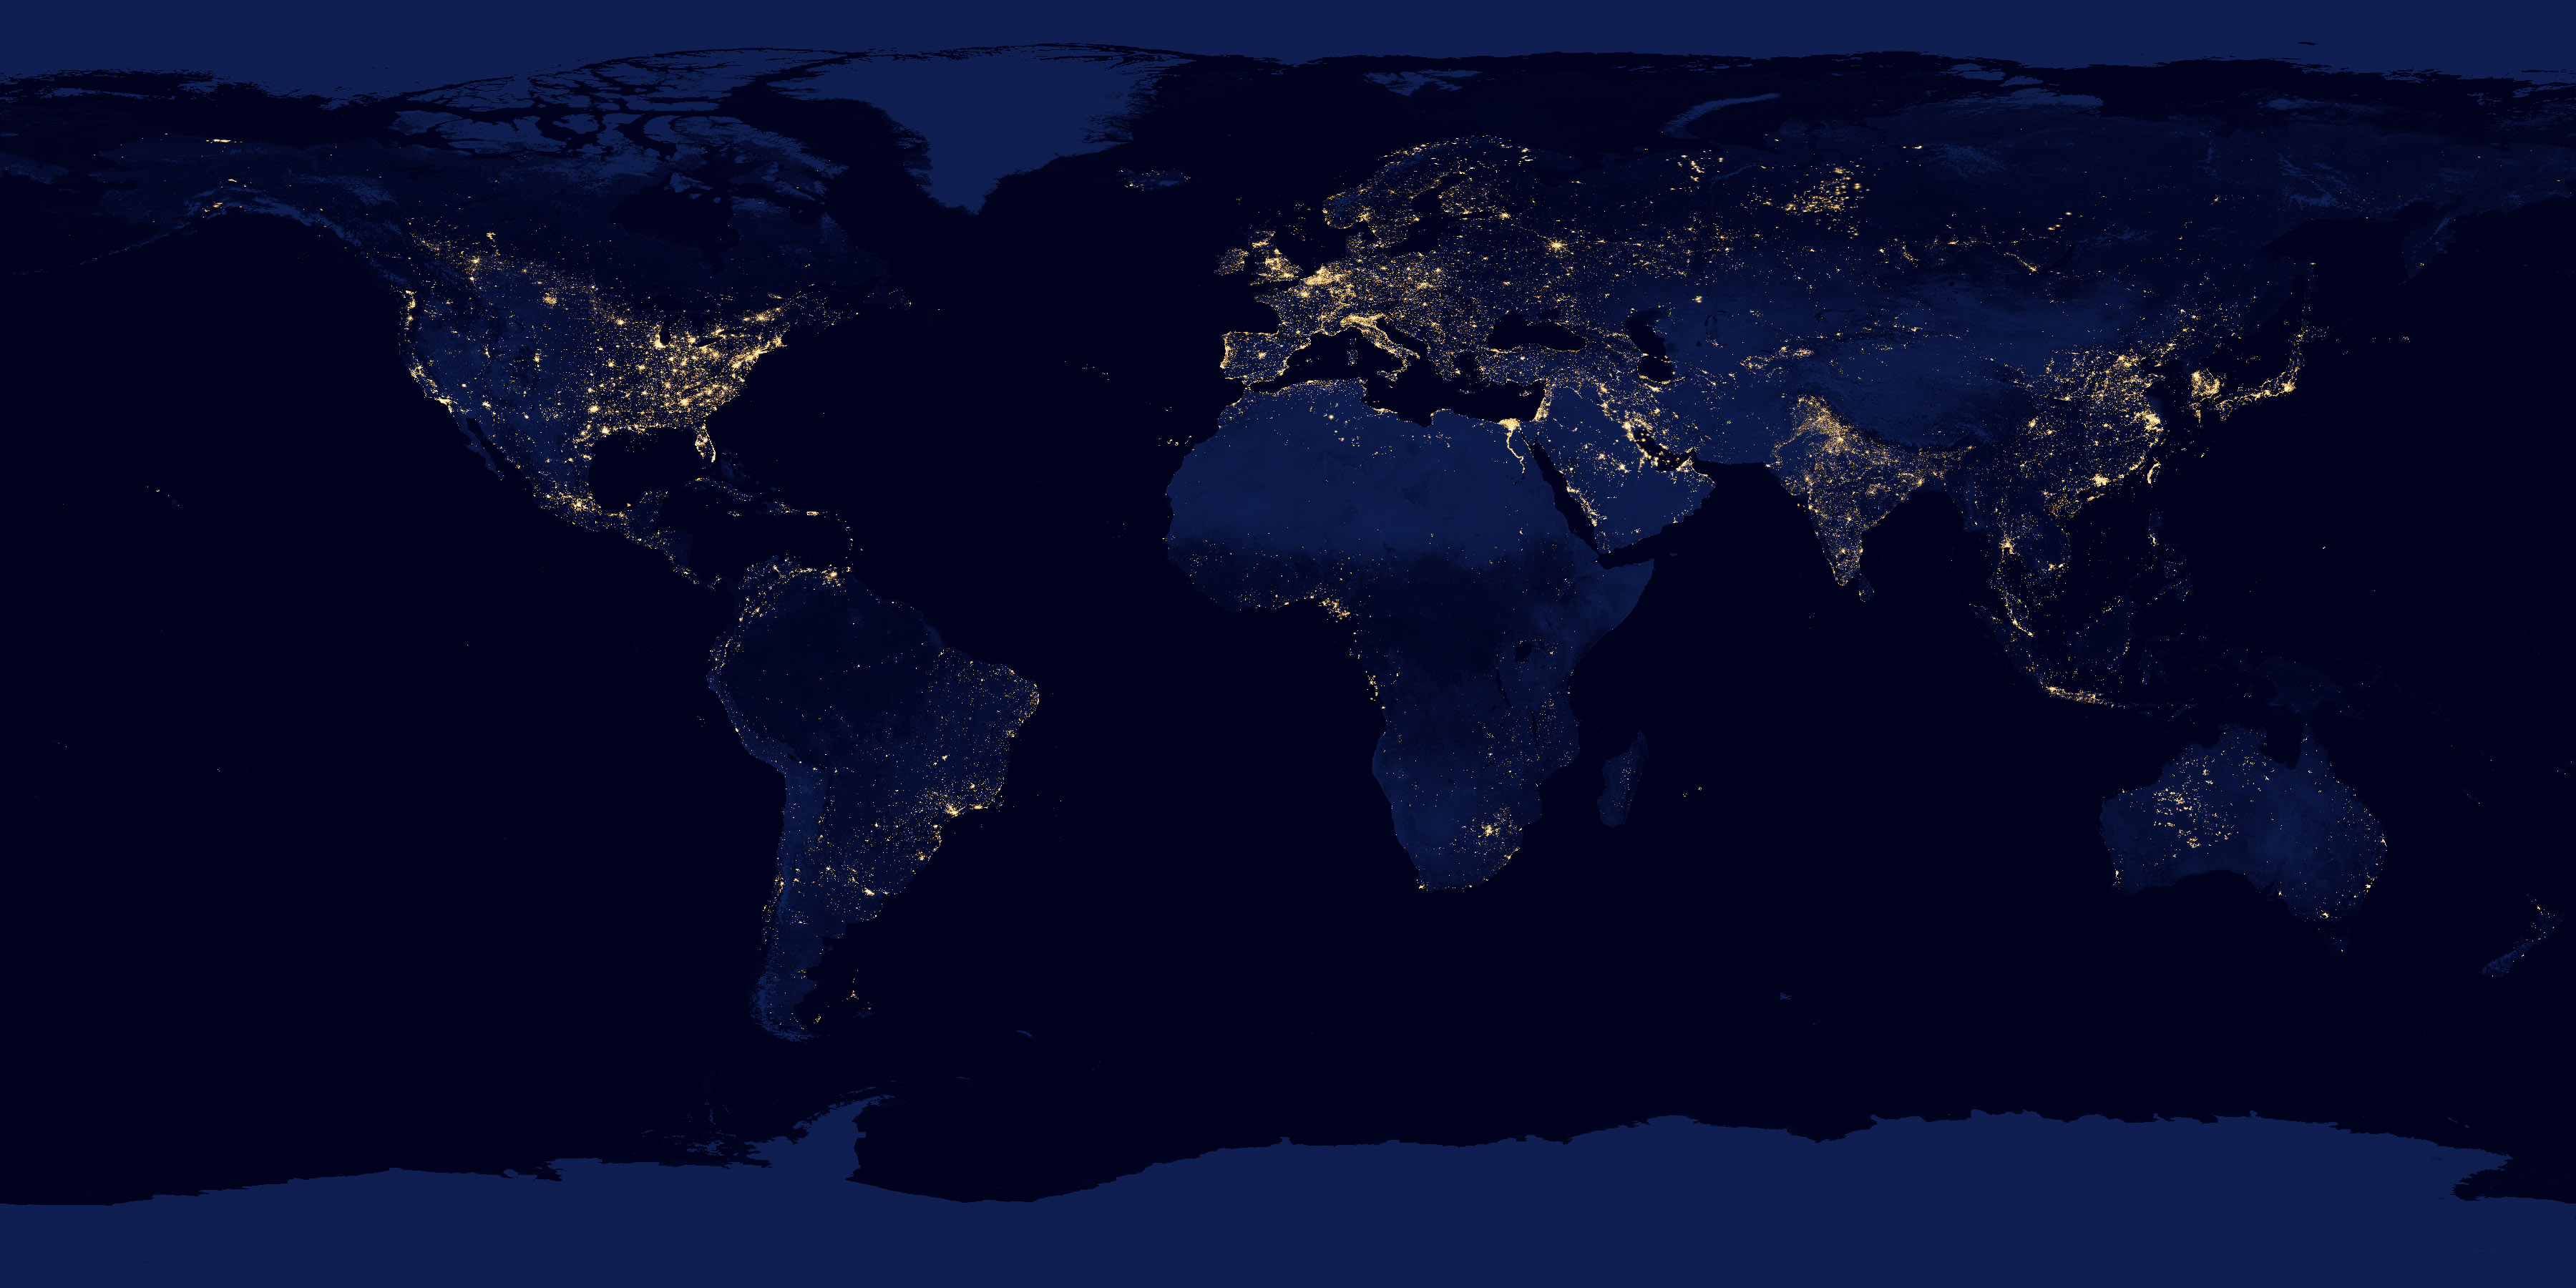

In [1]:
from IPython.display import Image
Image(filename = 'lights_at_night.jpg', width = 2000, height = 2000)

<h1><center> WeatherPy - Homework 6 - API</center></h1>

#### 3 Observations

* Latitude affects temperature: It is common sense that as you get closer to the equator the temperature will rise.  This is clearly shown in the Latitude vs. Temperature graph with the curvlinear relationship demonstrating the change in temperature for cities with high and low latitudes.

* It appears that Latitude and Cloudiness are independent of each other.  There is no discernable relationship between Latitude and Cloudiness shown in Plot 3, with cities of varying Latitude showing varying values of Cloudiness.

* 72% of the randomly selected cities are in the northern hemisphere. 


#### Environment Setup

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from requests import get
from time import sleep
from pprint import pprint
from config import api_key
from datetime import datetime

#### Generate 500+ Random City Names

In [3]:
#
# This code cell was provided as starter code
#

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500) # Adjust the size for more cities
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500) # Must match above N size

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

#### Initalize needed objects for API calls

In [4]:
# Setup the cities iterator
city_list = [str(i) for i in cities]

# Initialize needed objects
city_count = 0
city_data = pd.DataFrame()

#### API Call
###### Note: This takes a few minutes ...

In [5]:
# For loop through the cities iterator, pulling needed data from the JSON request object
for city in city_list:
    
    # Get JSON response file for each city
    response = get('http://api.openweathermap.org/data/2.5/weather?q='
                   + city
                   + '&APPID='
                   + api_key 
                   + '&units=metric').json()
    
    # Pause for 1.175 seconds (70.5 seconds for 60 requests) 
    # to ensure compliance with request rate of 60 calls per minute
    sleep(1.175)
    
    try:
        
        # Test response code of JSON file for cities not found
        if response['cod'] == 200:
            
            # Pull needed data from JSON response object and insert into a dictionary
            city_dict = {
                'city_id': response['id'],
                'name': response['name'],
                'country': response['sys']['country'],
                'longitude': response['coord']['lon'],
                'latitude': response['coord']['lat'],
                'cloudiness': response['clouds']['all'],
                'humidity': response['main']['humidity'],
                'temperature': response['main']['temp'],
                'wind_speed': response['wind']['speed'],
                'time': response['dt']
            }
        
            # Create a temporary single row dataframe with the current cities data
            temp_df = pd.DataFrame(city_dict, index = ['city']).set_index('city_id')  
        
            # Add the temporary dataframe row to the pre-intialized city_data DataFrame
            city_data = pd.concat([city_data, temp_df])
        
            # Add 1 for each city iteration to the city counter
            city_count += 1
        
            # Collect the current cities name
            city_name = city_dict['name']    
            
            # Re-intialise the city dictionary to be empty for the next interation
            city_dict = {}
            
        else:
            
            print('City not found ... skipping.')
    
    # Raise a KeyError if a cities JSON response does not include all of the needed data
    except KeyError as e:
        
        print(f'Skipping city ... : KeyError: {e} not found.') 
    
    print(f'Accessing city # {city_count} | {city_name}')


Accessing city # 1 | Auki
Accessing city # 2 | Georgetown
Accessing city # 3 | Avarua
Accessing city # 4 | Peniche
Accessing city # 5 | East London
Accessing city # 6 | Karema
Accessing city # 7 | Ancud
Accessing city # 8 | Hobart
Accessing city # 9 | Narsaq
Accessing city # 10 | Fairbanks
Accessing city # 11 | Dzilam Gonzalez
Accessing city # 12 | Kruisfontein
Accessing city # 13 | Luwuk
Accessing city # 14 | Yellowknife
Accessing city # 15 | Zilair
Accessing city # 16 | Ribeira Grande
Accessing city # 17 | Rikitea
Accessing city # 18 | Vaini
Accessing city # 19 | Mahebourg
Accessing city # 20 | Provideniya
Accessing city # 21 | Bathsheba
City not found ... skipping.
Accessing city # 21 | Bathsheba
Accessing city # 22 | Brewster
Accessing city # 23 | Atuona
Accessing city # 24 | Punta Arenas
City not found ... skipping.
Accessing city # 24 | Punta Arenas
Accessing city # 25 | Dikson
Accessing city # 26 | Nuevitas
Accessing city # 27 | Port Alfred
Accessing city # 28 | Brigantine
Acces

Accessing city # 212 | Pandamatenga
Accessing city # 213 | Kerema
Accessing city # 214 | Chunhuhub
City not found ... skipping.
Accessing city # 214 | Chunhuhub
Accessing city # 215 | Deming
Accessing city # 216 | Hualmay
City not found ... skipping.
Accessing city # 216 | Hualmay
Accessing city # 217 | Jiaocheng
Accessing city # 218 | Dogondoutchi
City not found ... skipping.
Accessing city # 218 | Dogondoutchi
Accessing city # 219 | Hithadhoo
Accessing city # 220 | Safranbolu
Accessing city # 221 | Kenai
Accessing city # 222 | Saskylakh
Accessing city # 223 | Don Benito
City not found ... skipping.
Accessing city # 223 | Don Benito
Accessing city # 224 | Villarrica
Accessing city # 225 | Butaritari
Accessing city # 226 | Tongren
Accessing city # 227 | Mangai
Accessing city # 228 | Lockhart
Accessing city # 229 | Saint-Pierre
City not found ... skipping.
Accessing city # 229 | Saint-Pierre
Accessing city # 230 | Lashio
Accessing city # 231 | Ayagoz
Accessing city # 232 | Petropavlovsk

Accessing city # 421 | Wadi Musa
Accessing city # 422 | Gillette
Accessing city # 423 | Cockburn Town
Accessing city # 424 | Moussoro
Accessing city # 425 | Khanapur
Accessing city # 426 | Mehamn
Accessing city # 427 | Dicabisagan
Accessing city # 428 | Lahaina
Accessing city # 429 | Karwar
Accessing city # 430 | Tilichiki
Accessing city # 431 | Seminole
Accessing city # 432 | Yarmouth
Accessing city # 433 | Stuttgart
Accessing city # 434 | Ixtapa
Accessing city # 435 | Creston
City not found ... skipping.
Accessing city # 435 | Creston
Accessing city # 436 | Kontagora
Accessing city # 437 | Saldanha
Accessing city # 438 | Shiyan
Accessing city # 439 | La Ronge
Accessing city # 440 | Porto Novo
Accessing city # 441 | Matara
City not found ... skipping.
Accessing city # 441 | Matara
Accessing city # 442 | Ripky
Accessing city # 443 | Krefeld
Accessing city # 444 | Pervomayskiy
Accessing city # 445 | San Pedro
Accessing city # 446 | Ponnani
Accessing city # 447 | Ninotsminda
Accessing ci

#### Clean DataFrame

In [6]:
city_data = city_data.reset_index()

city = city_data.rename(columns={
    'name': 'City',
    'country': 'Country',
    'longitude': 'Lon',
    'latitude': 'Lat',
    'temperature': 'Temp',
    'wind_speed': 'Wind Speed',
    'humidity': 'Humidity',
    'cloudiness': 'Cloudiness (%)',
    'time': 'Time'
})


city['Time'] = pd.to_datetime(city['Time'], unit = 's')

request_time = city['Time'][0]
n_cities = len(city)

#### Preview DataFrame

In [7]:
city.head()

,city_id,City,Country,Lon,Lat,Cloudiness (%),Humidity,Temp,Wind Speed,Time
0,2339937,Auki,NG,6.51,12.18,85,73,25.44,4.91,2019-07-12 19:40:01
1,3378644,Georgetown,GY,-58.16,6.80,40,74,28.93,4.10,2019-07-12 19:40:02
2,4035715,Avarua,CK,-159.78,-21.21,40,88,22.00,1.00,2019-07-12 19:40:04
3,2264923,Peniche,PT,-9.38,39.36,40,94,21.30,2.10,2019-07-12 19:40:05
4,1006984,East London,ZA,27.91,-33.02,76,91,13.34,3.81,2019-07-12 19:40:07


In [8]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
city_id           595 non-null int64
City              595 non-null object
Country           595 non-null object
Lon               595 non-null float64
Lat               595 non-null float64
Cloudiness (%)    595 non-null int64
Humidity          595 non-null int64
Temp              595 non-null float64
Wind Speed        595 non-null float64
Time              595 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 46.6+ KB


#### Save CSV

In [9]:
city.to_csv('city_data.csv')

In [10]:
request_time = city['Time'][0]
n_cities = len(city)

#### Global parameter for plot font size

In [11]:
# Set the global plot parameter for font size
plt.rcParams.update({'font.size': 16})

# Place all plot objects in front of plot grids
plt.rcParams['axes.axisbelow'] = True

<center><h2>Plot 1 - Temperature</h2></center>

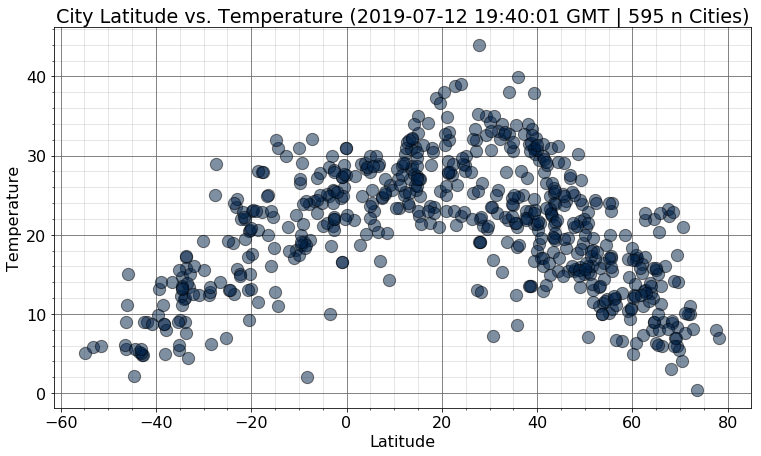

In [12]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Temp'],
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Temperature')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Temperature ({request_time} GMT | {n_cities} n Cities)')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('WeatherPy - Temperature.png')

plt.show()

<center><h2>Plot 2 - Humidity</h2></center>

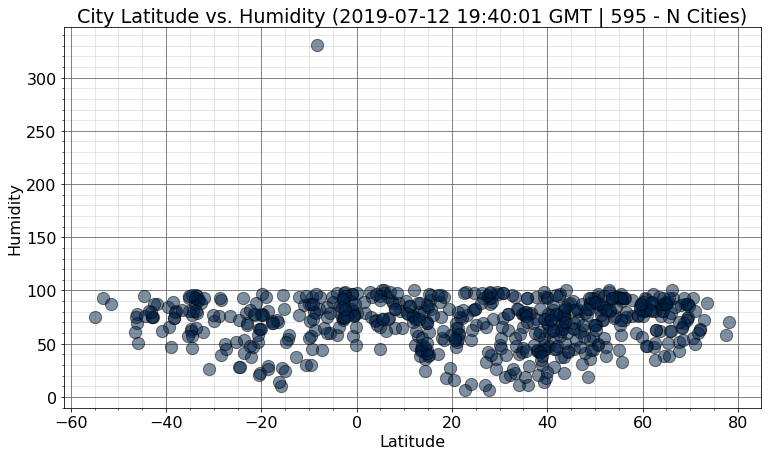

In [13]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Humidity'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({request_time} GMT | {n_cities} - N Cities)')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('WeatherPy - Humidity.png')

plt.show()

<center><h2>Plot 3 - Cloudiness</h2></center>

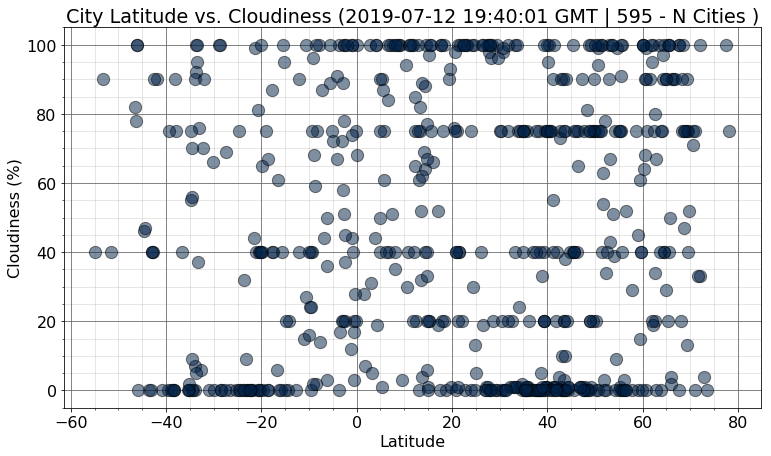

In [14]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Cloudiness (%)'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({request_time} GMT | {n_cities} - N Cities )')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('WeatherPy - Cloudiness.png')

plt.show()

<center><h2>Plot 4 - Wind Speed</h2></center>

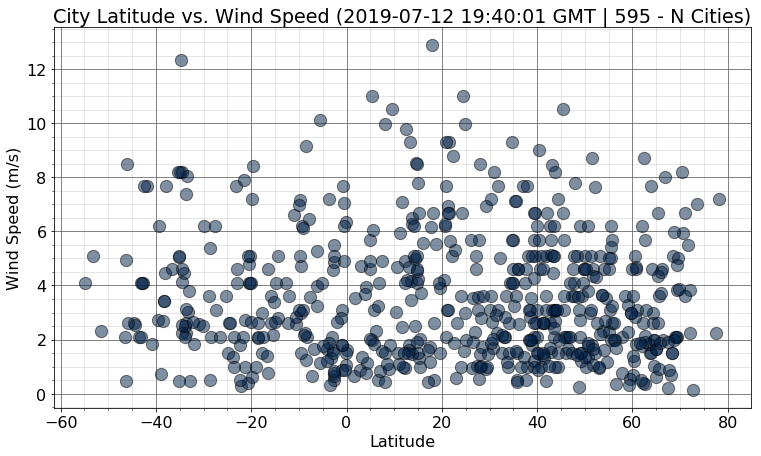

In [15]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Wind Speed'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({request_time} GMT | {n_cities} - N Cities)')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('WeatherPy - Wind Speed.png')

plt.show()

<center><h2>Global City Temperatures</h2></center>

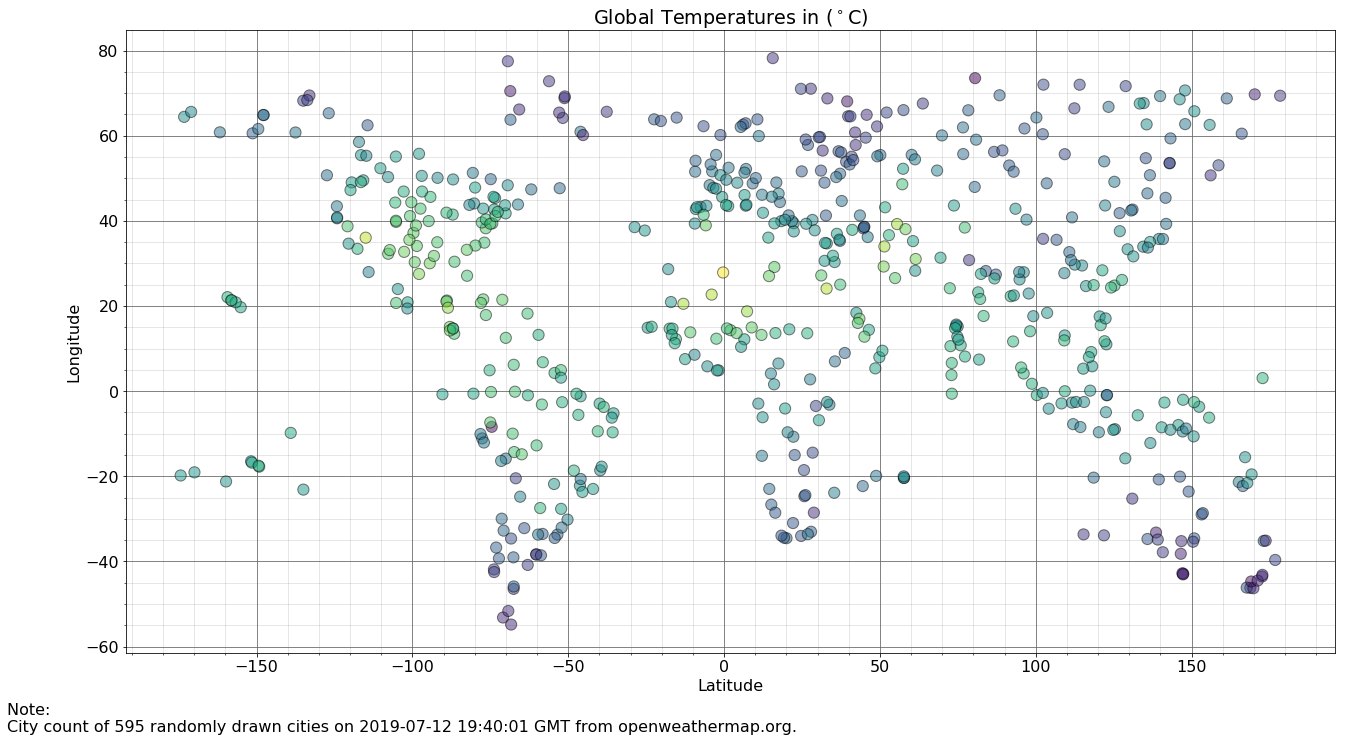

In [16]:
fig, ax = plt.subplots(1, figsize = [12.5*1.5, 7*1.5])

ax.scatter(
    city['Lon'], 
    city['Lat'], 
    c = city['Temp'], 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 125
)

ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title(f'Global Temperatures in ($^\circ$C)')

plt.text(-230, -80, f'Note: \nCity count of {n_cities} randomly drawn cities on {request_time} GMT from openweathermap.org.')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('WeatherPy - Global Temperature.png')

plt.show()

<center><h2>Histogram of City Temperatures</h2></center>

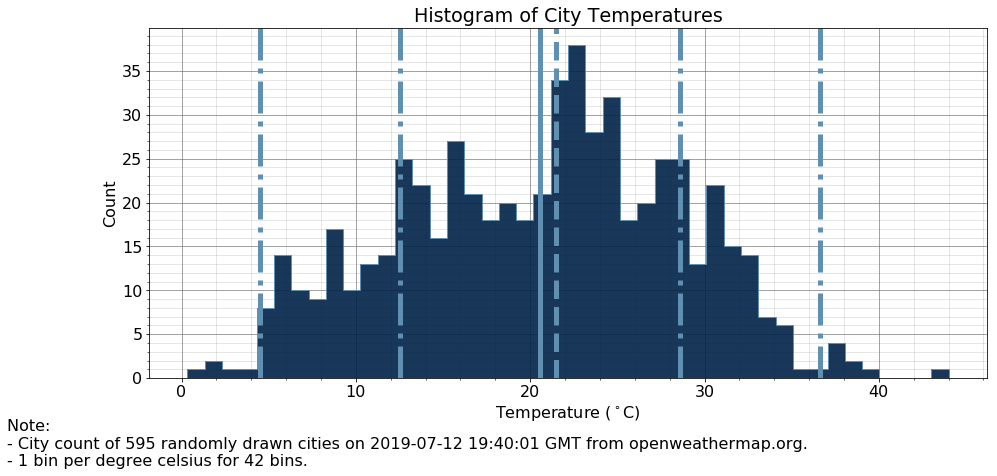

In [17]:
temp_bins = int(round(abs(city['Temp'].min()) + city['Temp'].max(), 0))

fig, ax = plt.subplots(1, figsize=[14, 7])

ax.hist(
    city['Temp'],
    bins = temp_bins,
    color = '#002147',
    alpha = .9
)
ax.hist(
    city['Temp'], 
    bins = temp_bins, 
    color = '#5F90B2', 
    histtype = 'step'
)

ax.set_xlabel('Temperature ($^\circ$C)')
ax.set_ylabel('Count')
ax.set_title('Histogram of City Temperatures')

plt.text(-10, -10, f'Note: \n- City count of {n_cities} randomly drawn cities on {request_time} GMT from openweathermap.org. \
                    \n- 1 bin per degree celsius for 42 bins.')

temp_mean = city['Temp'].mean()
ax.axvline(
    x = temp_mean, 
    color = '#5F90B2', 
    lw = 5
)

temp_median = city['Temp'].median()
ax.axvline(
    x = temp_median, 
    color = '#5F90B2', 
    lw = 5, 
    ls = '--'
)

temp_std = round(city['Temp'].std(), 2)

ax.axvline(
    x = temp_std + temp_mean,
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

ax.axvline(
    x = temp_std + temp_std + temp_mean,
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

ax.axvline(
    x = temp_mean - temp_std, 
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

ax.axvline(
    x = temp_mean - temp_std - temp_std, 
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig('Histogram of City Temperatures')

plt.show()

<center><h2>Scatterplot of Northern Hemisphere Cities vs. Temperature</h2></center>

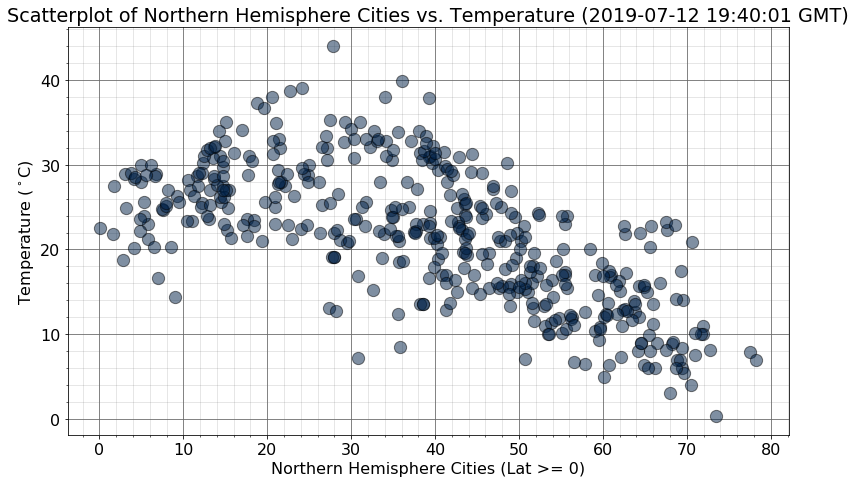

In [18]:
northern_hemi = city[city['Lat'] >= 0]

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    northern_hemi['Lat'], 
    northern_hemi['Temp'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_xlabel('Northern Hemisphere Cities (Lat >= 0)')
ax.set_title(f'Scatterplot of Northern Hemisphere Cities vs. Temperature ({request_time} GMT)')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('WeatherPy - Wind Speed ({request_time}).png')

plt.show()

<center><h2>Histogram of City Latitudes</h2></center>

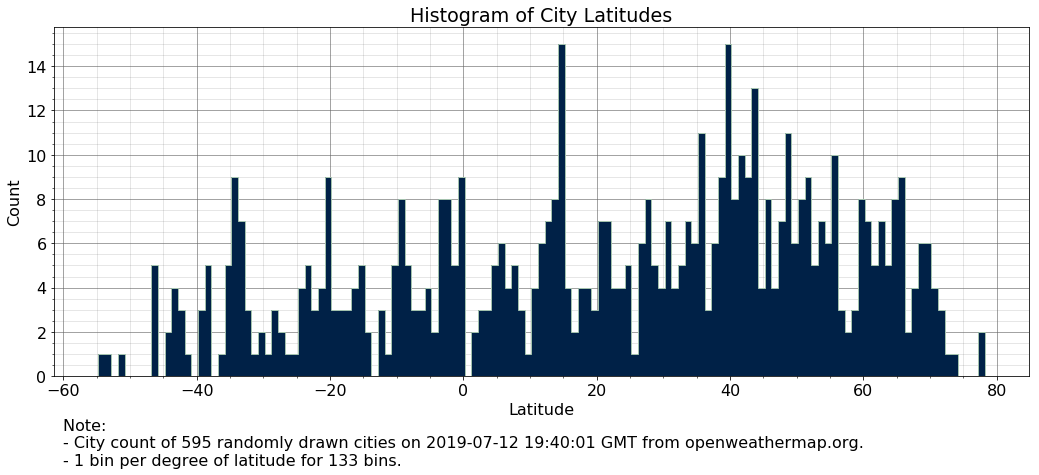

In [27]:
fig, ax = plt.subplots(1, figsize=[15, 7])

lat_bins = int(round(abs(city['Lat'].min()) + city['Lat'].max(), 0))

ax.hist(
    city['Lat'],
    bins = lat_bins,
    color = '#002147'
)
ax.hist(
    city['Lat'], 
    bins = lat_bins, 
    color = '#A3C1AD', 
    histtype = 'step'
)

ax.set_xlabel('Latitude')
ax.set_ylabel('Count')
ax.set_title('Histogram of City Latitudes')

plt.text(-60, -4,
         f'Note: \n- City count of {n_cities} randomly drawn cities on {request_time} GMT from openweathermap.org. \
         \n- 1 bin per degree of latitude for 133 bins. ')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig('Histogram of City Latitudes.png')

plt.show()

In [28]:
city.head()

,city_id,City,Country,Lon,Lat,Cloudiness (%),Humidity,Temp,Wind Speed,Time
0,2339937,Auki,NG,6.51,12.18,85,73,25.44,4.91,2019-07-12 19:40:01
1,3378644,Georgetown,GY,-58.16,6.80,40,74,28.93,4.10,2019-07-12 19:40:02
2,4035715,Avarua,CK,-159.78,-21.21,40,88,22.00,1.00,2019-07-12 19:40:04
3,2264923,Peniche,PT,-9.38,39.36,40,94,21.30,2.10,2019-07-12 19:40:05
4,1006984,East London,ZA,27.91,-33.02,76,91,13.34,3.81,2019-07-12 19:40:07


#### Northen Hemisphere City Percentage

In [34]:
northern = city[city['Lat'] >= 0]
round(northern['city_id'].nunique()/city['city_id'].nunique(), 2)

0.72